170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 118s 298ms/step - loss: 0.6017 - val_loss: 0.5773
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 296ms/step - loss: 0.5755 - val_loss: 0.5750
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 296ms/step - loss: 0.5734 - val_loss: 0.5732
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 150s 317ms/step - loss: 0.5717 - val_loss: 0.5732
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 312ms/step - loss: 0.5715 - val_loss: 0.5721
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 302ms/step - loss: 0.5708 - val_loss: 0.5717
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 309ms/step - loss: 0.5708 - val_loss: 0.5716
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 316ms/step - loss: 0.5701 - val_loss: 0.5714
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 314ms/step - loss: 0.5706 - val_loss: 0.5713
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 306ms/step - loss: 0.5701 - val_loss: 0.5707
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 302ms/step - loss: 0.5700 - val_loss: 0.5707
Epoch 12

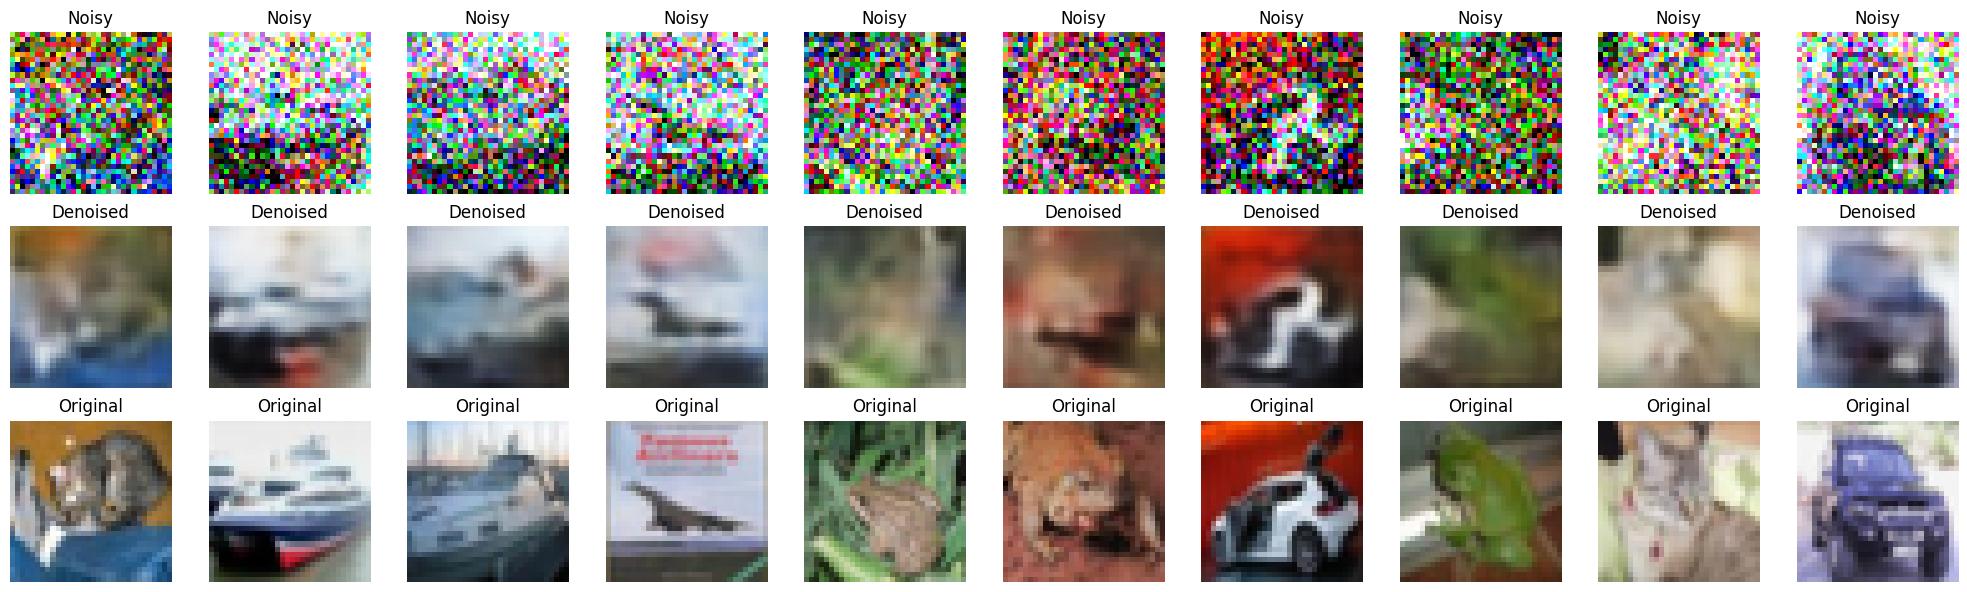

In [1]:
# Step 1: Install Libraries
!pip install -q tensorflow matplotlib

# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 3: Load CIFAR-10 Dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# Normalize to [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Step 4: Add Noise
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Step 5: Build the Autoencoder
autoencoder = models.Sequential([
    # Encoder
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),

    # Decoder
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')
])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Step 6: Train the Model
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Step 7: Predict on Test Data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Step 8: Visualize Results
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # Original
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 9: Save the model
autoencoder.save("cifar10_denoising_autoencoder.h5")
